In [ ]:
from rsna_retro.imports import *
from rsna_retro.metadata import *
from rsna_retro.preprocess import *
from rsna_retro.train import *

In [2]:
torch.cuda.set_device(3)

## Load Model

In [3]:
name = 'baseline_any_resnet18'

In [4]:
dbch = get_data(512, 128)
learn = get_learner(dbch, resnet18, pretrained=True)

In [5]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

## Training

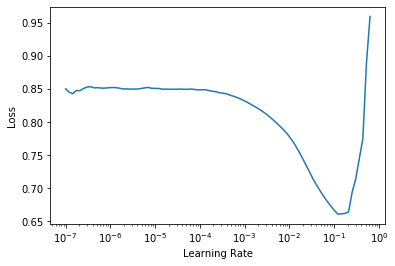

In [6]:
learn.lr_find()

In [8]:
do_fit(learn, 20, 4e-2, freeze=True)
learn.save(f'runs/{name}-1')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time
0,0.248802,0.249087,0.905889,0.827599,02:42


epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time
0,0.229363,0.240654,0.911239,0.835518,02:57
1,0.220753,0.251326,0.911654,0.830539,03:05
2,0.218623,0.332006,0.896354,0.778175,03:05
3,0.213696,0.287323,0.903055,0.800503,02:50
4,0.207744,0.226922,0.914638,0.845610,02:56
5,0.202224,0.224708,0.920324,0.848868,02:58
6,0.199627,0.209041,0.923962,0.863197,02:54
7,0.196813,0.206747,0.924407,0.865952,02:58
8,0.195740,0.207692,0.925016,0.860548,02:52
9,0.193083,0.205530,0.925180,0.862482,03:00


In [9]:
learn.dls = get_data(512, 256)
learn.load(f'runs/{name}-1')

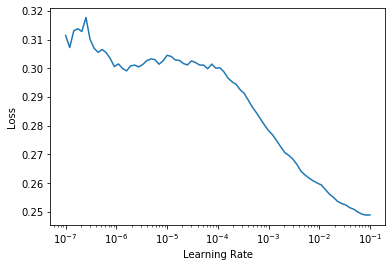

In [23]:
learn.lr_find()

In [10]:
do_fit(learn, 20, 4e-3)
learn.save(f'runs/{name}-2')

KeyboardInterrupt: 

In [ ]:
learn.dls = get_data(512, None, full_ds=True)
do_fit(learn, 2, 4e-4)
learn.save(f'runs/{name}-3-full')

## Submission

In [11]:
learn.load(f'runs/{name}-3-full')
sub_fn = f'subm/{name}'

In [12]:
learn.dls = get_test_data(meta.df_tst, bs=512, sz=None, tst_dir='tst_jpg256')

In [13]:
ob = learn.dls.one_batch()

In [16]:
preds,targs = learn.get_preds()

In [ ]:
pred_csv = submission(meta.df_tst, preds, fn=sub_fn)

In [20]:
from IPython.display import FileLink, FileLinks
from kaggle import api

In [21]:
FileLink(f'{sub_fn}.csv')

/home/ashaw/kaggle/rsna_retro/subm/baseline_any.csv

In [22]:
api.competition_submit(f'{sub_fn}.csv', 'train_02_any', 'rsna-intracranial-hemorrhage-detection')

100%|██████████| 26.0M/26.0M [00:04<00:00, 6.23MB/s]


Successfully submitted to RSNA Intracranial Hemorrhage Detection

In [27]:
api.competitions_submissions_list('rsna-intracranial-hemorrhage-detection')[0]

{'ref': 13722309,
 'totalBytes': 27277209,
 'date': '2019-12-10T08:50:51.717Z',
 'description': 'train_02_any',
 'errorDescription': None,
 'fileName': 'baseline_any.csv',
 'publicScore': '0.72453',
 'privateScore': '0.07846',
 'status': 'complete',
 'submittedBy': 'Andrew Shaw',
 'submittedByRef': 'bearpelican',
 'teamName': 'Andrew Shaw',
 'type': 'standard',
 'url': 'https://www.kaggle.com/submissions/13722309/13722309.raw'}